# Partie 1
## Questions
*1. Justifier pourquoi l’algorithme de la puissance itérée (vu en détails dans le TD de R2.09
dédiée à la SAE) permet de calculer le score de chacune des pages.*

L'algorithme de la puissance itérée permet de calculer le score de chacune des pages car cette fonction permet de calculer un vecteur propre de la matrice, et ce vecteur propre est utilisé afin de trouver le score de chaque page.

*2. Implémenter cet algorithme pour calculer le score de chacune des pages du graphe
précédent. On vérifiera (numériquement) que le vecteur de score obtenu est bien ap-
proximativement solution de r = Qr.*

Voici une implémentation Python de la fonction de puissance itérée:
La fonction prend en entrée une Matrice `M` et un seuil d'approximation `e` et retourne un vecteur propre `newX` pour cette matrice, une valeur propre `np.linalg.norm(np.dot(M, X))` et le nombre d'itérations effectués `n`.

In [2]:
import numpy as np

def puissance_iteree(M, e):
    X = np.array([np.random.randint(1, 10) for _ in range(len(M))])
    newX = X
    n = 1
    while 1:
        newX = (np.dot(M, X)) / np.linalg.norm(np.dot(M, X))
        if np.linalg.norm(newX - X) <= e: break
        X = newX
        n += 1
    return newX, np.linalg.norm(np.dot(M, X)), n

def calculQ(M):
    N = np.sum(M, axis=0)
    q = np.empty((M[0].size, M[0].size))
    for i in range(M[0].size):
        for j in range(M[0].size):
            if N[j] == 0:
                q[i][j] = 0
            else:
                q[i][j] = M[i][j] / N[j]
    return q
    
            

In [3]:
N = 14

# i = horizontal # j = vertical

matriceCPartie1 = np.array([
    #1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11,12,13,14
    [0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0], # 1
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 2
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 3
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 4
    [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 5
    [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], # 6
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], # 7
    [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0], # 8
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], # 9
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1], # 10
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], # 11
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0], # 12
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0], # 13
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0], # 14
    ])

vecteurPropre, valeurPropre, iterations = puissance_iteree(matriceCPartie1, 10**(-6))

for index, elem in enumerate(vecteurPropre):
    print(f"Score Page {index+1}: {elem}")

Score Page 1: 0.3934595451517009
Score Page 2: 0.1498694042828181
Score Page 3: 0.20695490878545744
Score Page 4: 0.22869887030720926
Score Page 5: 0.29406668440447054
Score Page 6: 0.40267256064095425
Score Page 7: 0.15337882539413708
Score Page 8: 0.27022345986259527
Score Page 9: 0.15337882539413708
Score Page 10: 0.39347198803301
Score Page 11: 0.1498744720651413
Score Page 12: 0.20696204059274698
Score Page 13: 0.22870684275815512
Score Page 14: 0.29407706326081334


Afin de vérifier que le calcul est correct, on vérifie `r = Qr`
Pour que cette formule sois vrai, il faut que Q soit 1.
On calcul donc la valeur propre de Q:

In [4]:
print(f"Valeur propre de Q pour matrice: {puissance_iteree(calculQ(matriceCPartie1), 10**(-8))[1]}")

Valeur propre de Q pour matrice: 0.9999999999999991


On remarque que la valeur propre de Q est bien égal à 1, donc, `r = Qr`.

*3. Analyser la pertinence du résultat obtenu.*

Le résultat signifie que la page qui sera tout en haut du moteur de recherche sera la page 6, puisqu'elle a le score le plus important. En revanche, les pages 2 et 11 seront les plus basses, puisqu'elles sont les moins importantes.

# Partie 2

In [5]:
N = 5

matriceCPartie2 = np.array([
    [0, 1, 1, 1, 1],
    [0, 0, 0, 1, 1],
    [0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0],
    ])

#vecteurPropre, valeurPropre, iterations = puissance_iteree(matriceCPartie2, 10**(-6))
    
#for index, elem in enumerate(vecteurPropre):
#    print(f"Score Page {index+1}: {elem}")

On se rend compte que pour les pages ne se faisant *pointé par aucune autre page*, l'algorithme tente de *diviser par 0*. Pour régler cela, on instaure une **matrice de transition** avec un **facteur d'amortissement**.

In [10]:
def calculP(M, N, a):
    P = np.empty((N, N))
    Nj = np.sum(M, axis=0)
    Q = calculQ(M)
    for i in range(N):
        for j in range(N):
            if Nj[j] == 0:
                P[i][j] = 1/N
            else:
                P[i][j] = a * Q[i][j] + (1 - a) / N
    return P

vecteurPropre, valeurPropre, iterations = puissance_iteree(calculP(matriceCPartie2, N, 0.85), 10**(-6))

for index, elem in enumerate(vecteurPropre):
    print(f"Score Page {index+1}: {elem}")

Score Page 1: 0.8258223259917823
Score Page 2: 0.4010219670893374
Score Page 3: 0.1974869307597532
Score Page 4: 0.28141906858545623
Score Page 5: 0.1974869307597532


On remarque que maintenant les scores sont bien calculé sans erreurs, et que la page 1, qu'on peut facilement déduire aura le plus haut score, puisque pointé par beaucoups de pages, a bien le plus haut score dans nos résultats. On vérifie maintenant que `r = Pr`, ou que `P` soit égal à 1.

In [12]:
print(f"Valeur propre de P pour matrice: {puissance_iteree(calculP(matriceCPartie1, N, 0.85), 10**(-8))[1]}")

Valeur propre de P pour matrice: 0.9337866268424289


On remarque que P est approximativement égal à 1, donc `r = Pr`.

# Partie 3

*1. Analyser l’influence du critère d’arrêt dans l’algorithme de la puissance itérée.*

Plus le seuil de précision augmente, plus on devrait avoir un résultat précis et plus on devrait avoir d'itérations. On vérifie cela grâce à une représentation graphique avec différent seuils de précisions. On regardera non seulement le nombre d'itérations, mais aussi la précision du résultat. On fera donc cela avec Q, puisque l'on sait que Q devrait valoir 1.

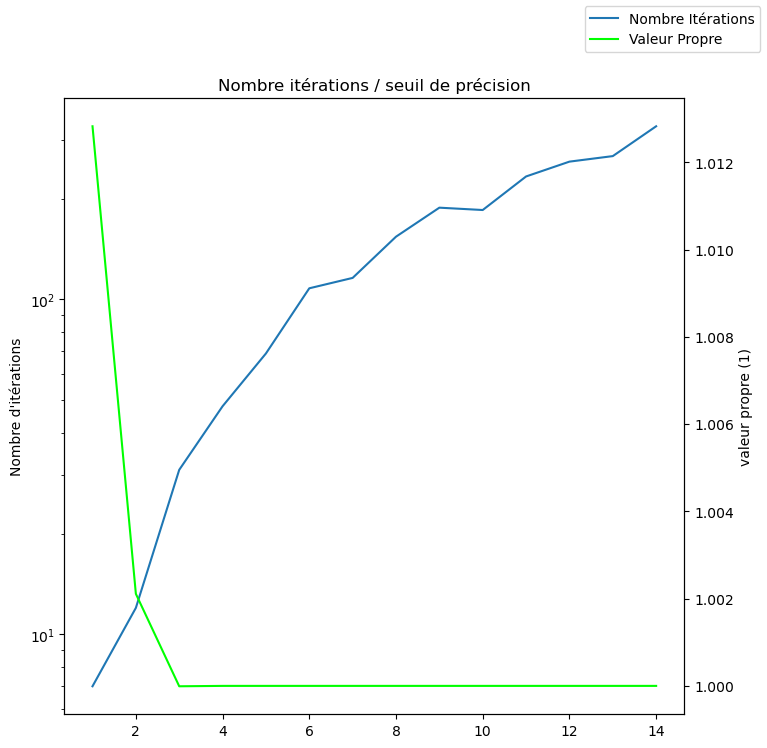

In [49]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

l = []
v = []
Q = calculQ(matriceCPartie1)
for x in range(1, 15):
    e = 10**(-x)
    puit = puissance_iteree(Q, e)
    l.append(puit[2])
    v.append(puit[1])
ax1.semilogy(range(1, 15), l)
plt.title("Nombre itérations / seuil de précision")
ax1.set_ylabel("Nombre d'itérations")
ax2.plot(range(1, 15), v, color="#00FF00")
ax2.set_ylabel("valeur propre (1)")
fig.legend(["Nombre Itérations", "Valeur Propre"])

plt.show()

Sur ce graphe, on remarque bien que le nombre d'itérations augmente, et que la valeur propre s'approche de 1, ce qui est le bon résultat. On remarque aussi que tout seuil de précision au delà de 10e-3 n'est pas nécessaire puisque dès 10e-3, la valeur propre vaut 1.